## OpenAI Image Generation API Parameters

`client.images.generate()` 메서드의 파라미터 정리

---

## 필수 파라미터

| 파라미터 | 타입 | 설명 |
|----------|------|------|
| **`prompt`** | string | 생성할 이미지에 대한 텍스트 설명 |

> **최대 길이**: GPT image models: 32,000자 / DALL-E 3: 4,000자 / DALL-E 2: 1,000자

---

## 모델 선택

| 파라미터 | 타입 | 기본값 | 설명 |
|----------|------|--------|------|
| **`model`** | string | `dall-e-2` | 사용할 모델 |

### 사용 가능한 모델

| 모델 | 특징 |
|------|------|
| `dall-e-2` | 기본 모델, 저렴함 |
| `dall-e-3` | 고품질, n=1만 지원 |
| `gpt-image-1` | 최신 GPT 이미지 모델 |
| `gpt-image-1-mini` | GPT 이미지 모델 (경량) |
| `gpt-image-1.5` | GPT 이미지 모델 (최신) |

---

## 이미지 설정

| 파라미터 | 타입 | 기본값 | 지원 모델 | 설명 |
|----------|------|--------|-----------|------|
| **`size`** | string | `auto` | 전체 | 이미지 크기 |
| **`quality`** | string | `auto` | 전체 | 이미지 품질 |
| **`n`** | integer | `1` | 전체 | 생성할 이미지 수 (1-10) |
| **`style`** | string | `vivid` | DALL-E 3만 | `vivid` 또는 `natural` |
| **`background`** | string | `auto` | GPT 모델만 | `transparent`, `opaque`, `auto` |

### 크기 옵션

| 모델 | 지원 크기 |
|------|-----------|
| GPT image models | `1024x1024`, `1536x1024` (가로), `1024x1536` (세로), `auto` |
| DALL-E 3 | `1024x1024`, `1792x1024`, `1024x1792` |
| DALL-E 2 | `256x256`, `512x512`, `1024x1024` |

### 품질 옵션

| 모델 | 지원 품질 |
|------|-----------|
| GPT image models | `high`, `medium`, `low`, `auto` |
| DALL-E 3 | `hd`, `standard` |
| DALL-E 2 | `standard`만 |

---

## 출력 설정

| 파라미터 | 타입 | 기본값 | 지원 모델 | 설명 |
|----------|------|--------|-----------|------|
| **`output_format`** | string | `png` | GPT 모델만 | `png`, `jpeg`, `webp` |
| **`output_compression`** | integer | `100` | GPT 모델만 | 압축률 (0-100%) |
| **`response_format`** | string | `url` | DALL-E만 | `url` 또는 `b64_json` |

> ⚠️ **주의**: URL은 생성 후 **60분**만 유효

---

## 고급 설정

| 파라미터 | 타입 | 기본값 | 설명 |
|----------|------|--------|------|
| **`stream`** | boolean | `false` | 스트리밍 모드 (GPT 모델만) |
| **`partial_images`** | integer | `0` | 부분 이미지 수 (0-3, 스트리밍용) |
| **`moderation`** | string | `auto` | 콘텐츠 필터링 (`low` 또는 `auto`) |
| **`user`** | string | - | 최종 사용자 식별자 (남용 모니터링용) |

---

## 사용 예시

```python
from openai import OpenAI

client = OpenAI()

# DALL-E 3
response = client.images.generate(
    model="dall-e-3",
    prompt="A red apple on a white background",
    size="1024x1024",
    quality="hd",
    n=1
)

# GPT Image Model
response = client.images.generate(
    model="gpt-image-1",
    prompt="A red apple on a white background",
    size="1024x1024",
    quality="high",
    output_format="png",
    background="transparent"
)

image_url = response.data[0].url  # DALL-E
# or
image_b64 = response.data[0].b64_json  # GPT models
```


## 테스트

In [1]:
import sys
sys.path.append('..')

from prompt import PROMPT
prompt = PROMPT
gpt_image_size = "1024x1536"
dalle_image_size = "1024x1792"

In [2]:
prompt

'\n레퍼런스 이미지를 기반으로, 인물의 얼굴(눈/코/입/얼굴형/피부톤/헤어라인/앞머리)과 전체 인상은 100% 동일하게 유지하고 절대 변형하지 마세요. 표정도 최대한 비슷하게 유지하세요.\n장면만 “영상통화 셀카캠 스크린샷”처럼 바꿔주세요: 유선 이어폰을 양쪽 귀에 꽂고, 상반신 클로즈업(머리~어깨), 정면 웹캠 각도, 실내 자연광, 담백한 배경.\n화질은 일부러 조금 안 좋게: 720p 느낌, 약한 블러/노이즈, 낮은 비트레이트, JPEG 압축 아티팩트, 살짝 흐린 선명도.\n미용 필터/과한 보정/스튜디오 조명/과도한 고해상도/피부 매끈 보정 금지.\n텍스트, 로고, 워터마크, UI 글자(읽을 수 있는 글자) 없이 “영상통화 중 캡처한 사진” 같은 현실적인 느낌으로 출력하세요.\n'

In [3]:
import base64
from openai import OpenAI

client = OpenAI()

gpt_image = client.images.edit(
    model="gpt-image-1.5",
    image=[
        open("../base_image.png", "rb")
    ],
    prompt=prompt,
    size=gpt_image_size,
    #quality='high'
)

In [4]:
image_bytes = base64.b64decode(gpt_image.data[0].b64_json)
with open("../images/openai_gpt_image_1.5.png", "wb") as f:
    f.write(image_bytes)


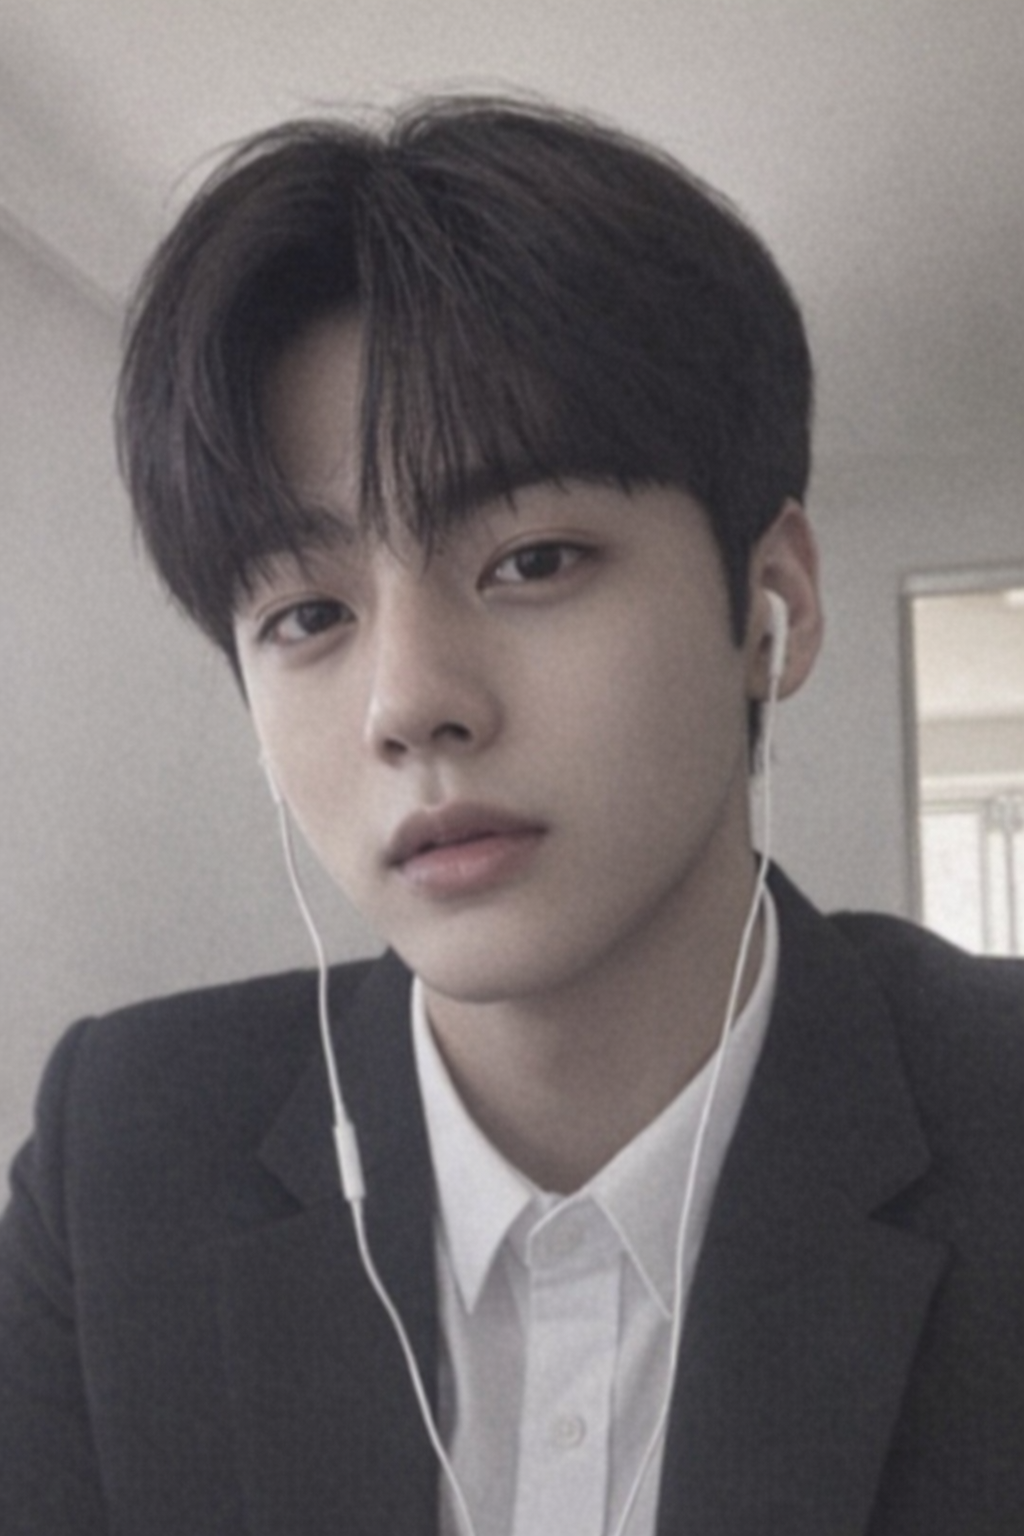

In [5]:
from IPython.display import Image, display
display(Image(data=image_bytes))

In [6]:
gpt_image.usage

Usage(input_tokens=758, input_tokens_details=UsageInputTokensDetails(image_tokens=452, text_tokens=306), output_tokens=6518, total_tokens=7276, output_tokens_details=UsageOutputTokensDetails(image_tokens=6240, text_tokens=278))

Input 비용:  758 / 1,000,000 × $5.00   = $0.00379
Output 비용: 6,518 / 1,000,000 × $10.00 = $0.06518
─────────────────────────────────────────────────
총 비용:                               ≈ $0.0690

응답 시간: 55.0초